In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats  # 進階統計
import seaborn as sns  # 高階資料視覺化
import matplotlib.font_manager as fm

# 設定中文字體，這裡以 SimHei 為例（SimHei 是常用的黑體字，支持中文）
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]  # 設置中文字體
plt.rcParams["axes.unicode_minus"] = False  # 解決座標軸負號顯示問題

In [2]:
df = pd.read_csv(r"/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_214050row_outlier_isolationForest.csv")
df.head()

,鄉鎮市區,土地位置建物門牌,交易年月日,建築完成年月,建物移轉總面積平方公尺,有無管理組織,總價元,單價元平方公尺,備註,編號,...,有無電梯,Region,建物移轉總面積坪,單價元每坪,房地總價元(坪),交易年份,建築完成年,交易年_民國,屋齡,屋齡區間
0,中西區,臺南市中西區金華路三段２１８號十五樓之１７,2022-09-02,840704.0,43.51,有,2170000,49874.0,NaN,RPVOMLLJRHHGFAD08DA,...,1.0,A,143.834705,164872.721090,2.371442e+07,2022,84,111,27,21年以上－未滿30年
1,北區,臺南市北區南園街１２７巷１５１弄３號,2022-08-01,640322.0,69.20,無,4500000,65029.0,NaN,RPOOMLSJQHHGFAD97DA,...,0.0,A,228.760322,214971.892765,4.917704e+07,2022,64,111,47,30年以上
2,佳里區,臺南市佳里區麻興路二段５３１號,2022-08-04,890919.0,130.97,無,8440000,64442.0,親友、員工、共有人或其他特殊關係間之交易；,RPQNMLKKQHHGFGD97DA,...,0.0,B,432.958661,213031.396970,9.223379e+07,2022,89,111,22,21年以上－未滿30年
3,新化區,臺南市新化區中正路６６２巷２２號,2022-08-01,650600.0,110.40,無,1200000,10870.0,親友、員工、共有人或其他特殊關係間之交易；,RPSOMLPJQHHGFHD78DA,...,0.0,A,364.958664,35933.882950,1.311438e+07,2022,65,111,46,30年以上
4,中西區,臺南市中西區南寧街１３６巷９號,2022-08-01,510000.0,81.05,無,10600000,130783.0,NaN,RPPNMLKKQHHGFAD37EA,...,0.0,A,267.933874,432340.479655,1.158387e+08,2022,51,111,60,30年以上


In [3]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間'],
      dtype='object')

In [4]:
sciencepark_data = pd.read_csv(
    r"/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/south_science_park_alldata.csv"
)
sciencepark_data.head()

,園區,西元年月,博士,碩士,大學,專科,高中,其他,其他.1,員工總計,...,電腦及周邊,通訊,精密機械,生物技術,其他.2,其他.3,營業額總計,污水處理量(CMD),用水量(CMD),用電負載量(萬KW)
0,南部科學園區,2014-10,628,13575,29026,11772,16706,425,0.31,72132,...,0.50,5.31,11.06,4.57,425,0.31,548.35,92998,133442,111.86
1,南部科學園區,2014-11,632,13673,29236,11857,16827,429,0.27,72654,...,0.45,5.58,13.88,4.03,429,0.27,484.95,93765,128533,112.43
2,南部科學園區,2014-12,631,13654,29195,11841,16803,429,0.19,72553,...,0.41,5.90,24.17,4.27,429,0.19,598.83,95737,130205,112.31
3,南部科學園區,2015-01,636,13755,29410,11928,16927,431,0.38,73087,...,0.46,6.34,12.85,5.29,431,0.38,467.80,95965,130158,112.54
4,南部科學園區,2015-02,632,13670,29228,11854,16822,428,0.31,72634,...,0.32,4.86,13.31,5.81,428,0.31,524.08,94773,124967,112.70


In [5]:
sciencepark_data["西元年月"] = pd.to_datetime(
    sciencepark_data["西元年月"], format="%Y-%m"
)
sciencepark_data["YearMonth"] = sciencepark_data["西元年月"].dt.to_period("M")

### 呈現整體平均每坪價格與時間的關係

/var/folders/ch/csqy_zv907j03ldtp72n07y80000gn/T/ipykernel_53372/1150026183.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grouped.index.astype(str), rotation=45, ha="right")


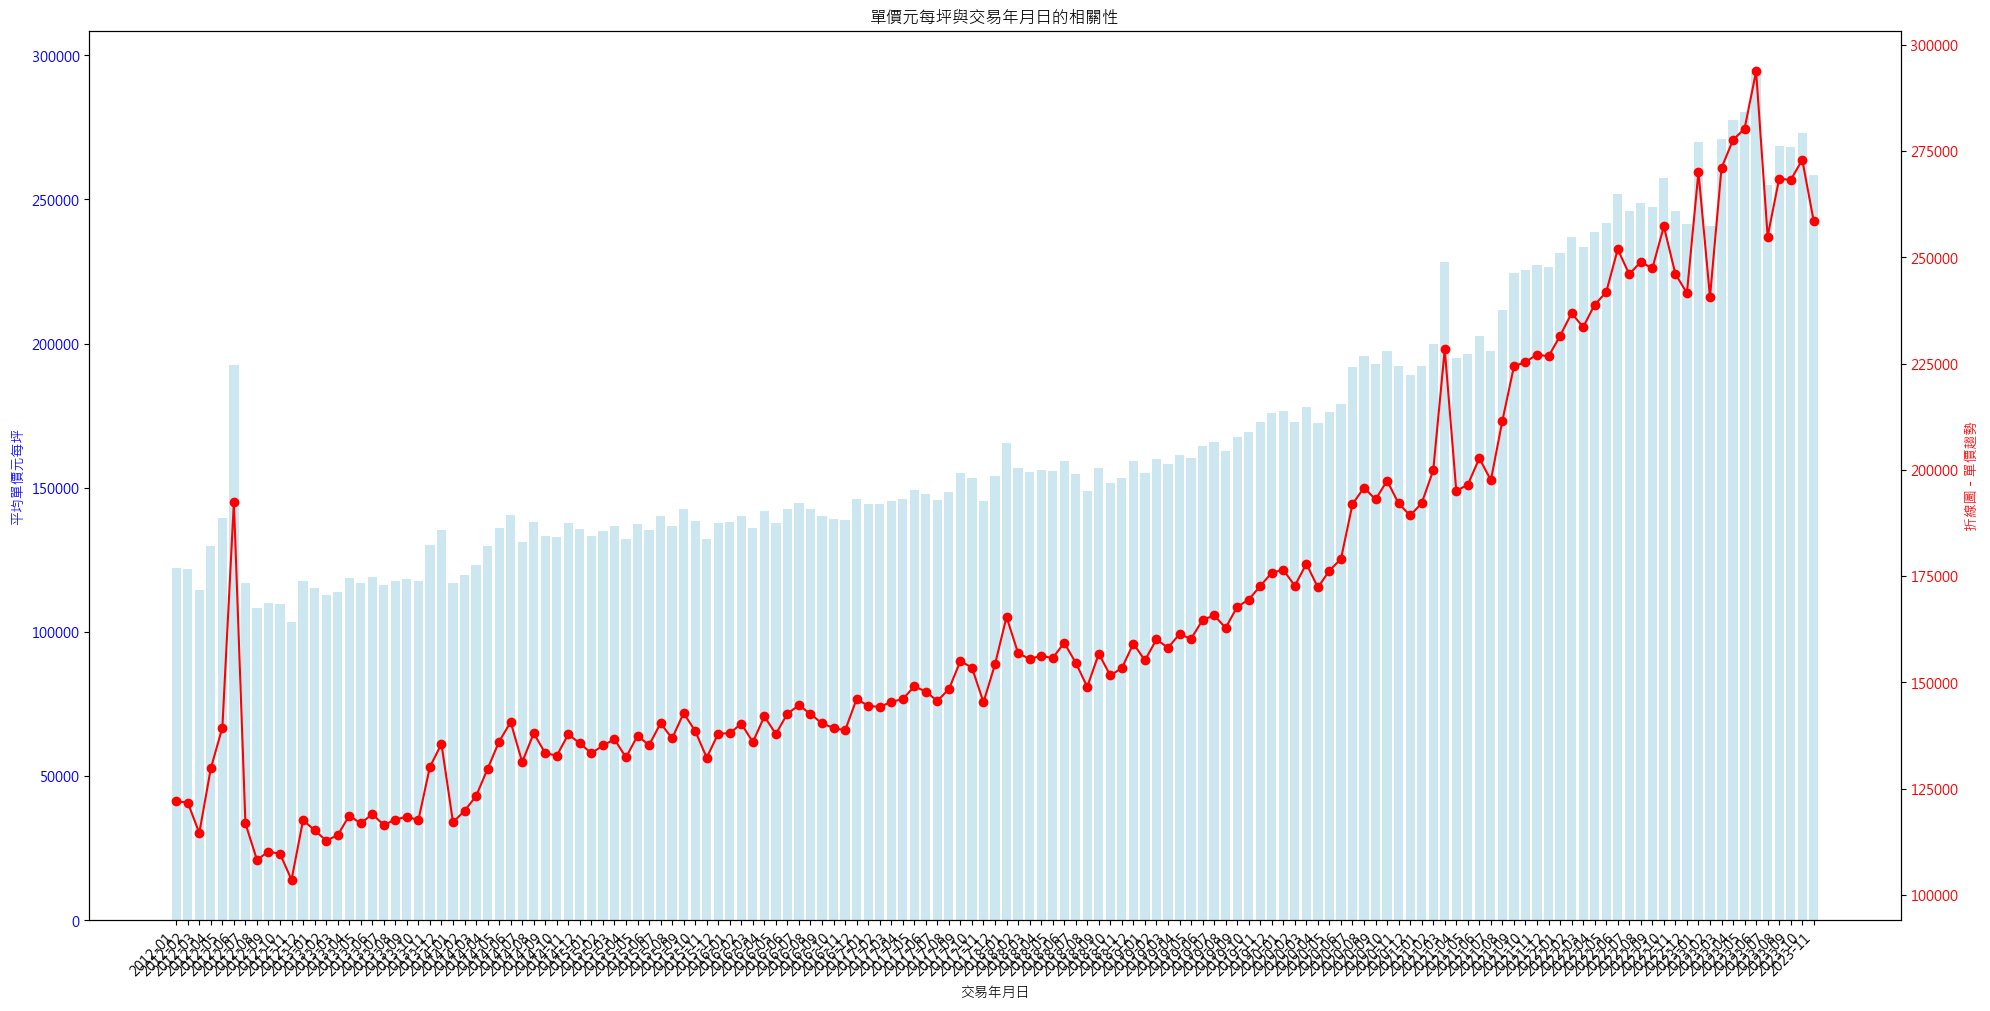

In [6]:
# 轉換 '交易年月日' 為日期格式
df["交易年月日"] = pd.to_datetime(df["交易年月日"], format="%Y-%m-%d")

# 按年月聚合數據，計算每月平均單價
df["YearMonth"] = df["交易年月日"].dt.to_period("M")
df_grouped = df.groupby("YearMonth")["單價元每坪"].mean()

# 繪圖
fig, ax1 = plt.subplots(figsize=(20, 10))

# 畫長條圖 - 使用第一個坐標軸
ax1.bar(
    df_grouped.index.astype(str),
    df_grouped,
    color="lightblue",
    alpha=0.6,
    label="單價元每坪",
)
ax1.set_xlabel("交易年月日")
ax1.set_ylabel("平均單價元每坪", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(df_grouped.index.astype(str), rotation=45, ha="right")


# 創建第二個坐標軸，畫折線圖
ax2 = ax1.twinx()
ax2.plot(
    df_grouped.index.astype(str), df_grouped, color="red", marker="o", label="單價走勢"
)
ax2.set_ylabel("折線圖 - 單價趨勢", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# 顯示圖例
fig.tight_layout()
plt.title("單價元每坪與交易年月日的相關性")
plt.show()

### 呈現每個行政區與單價-時間的關係

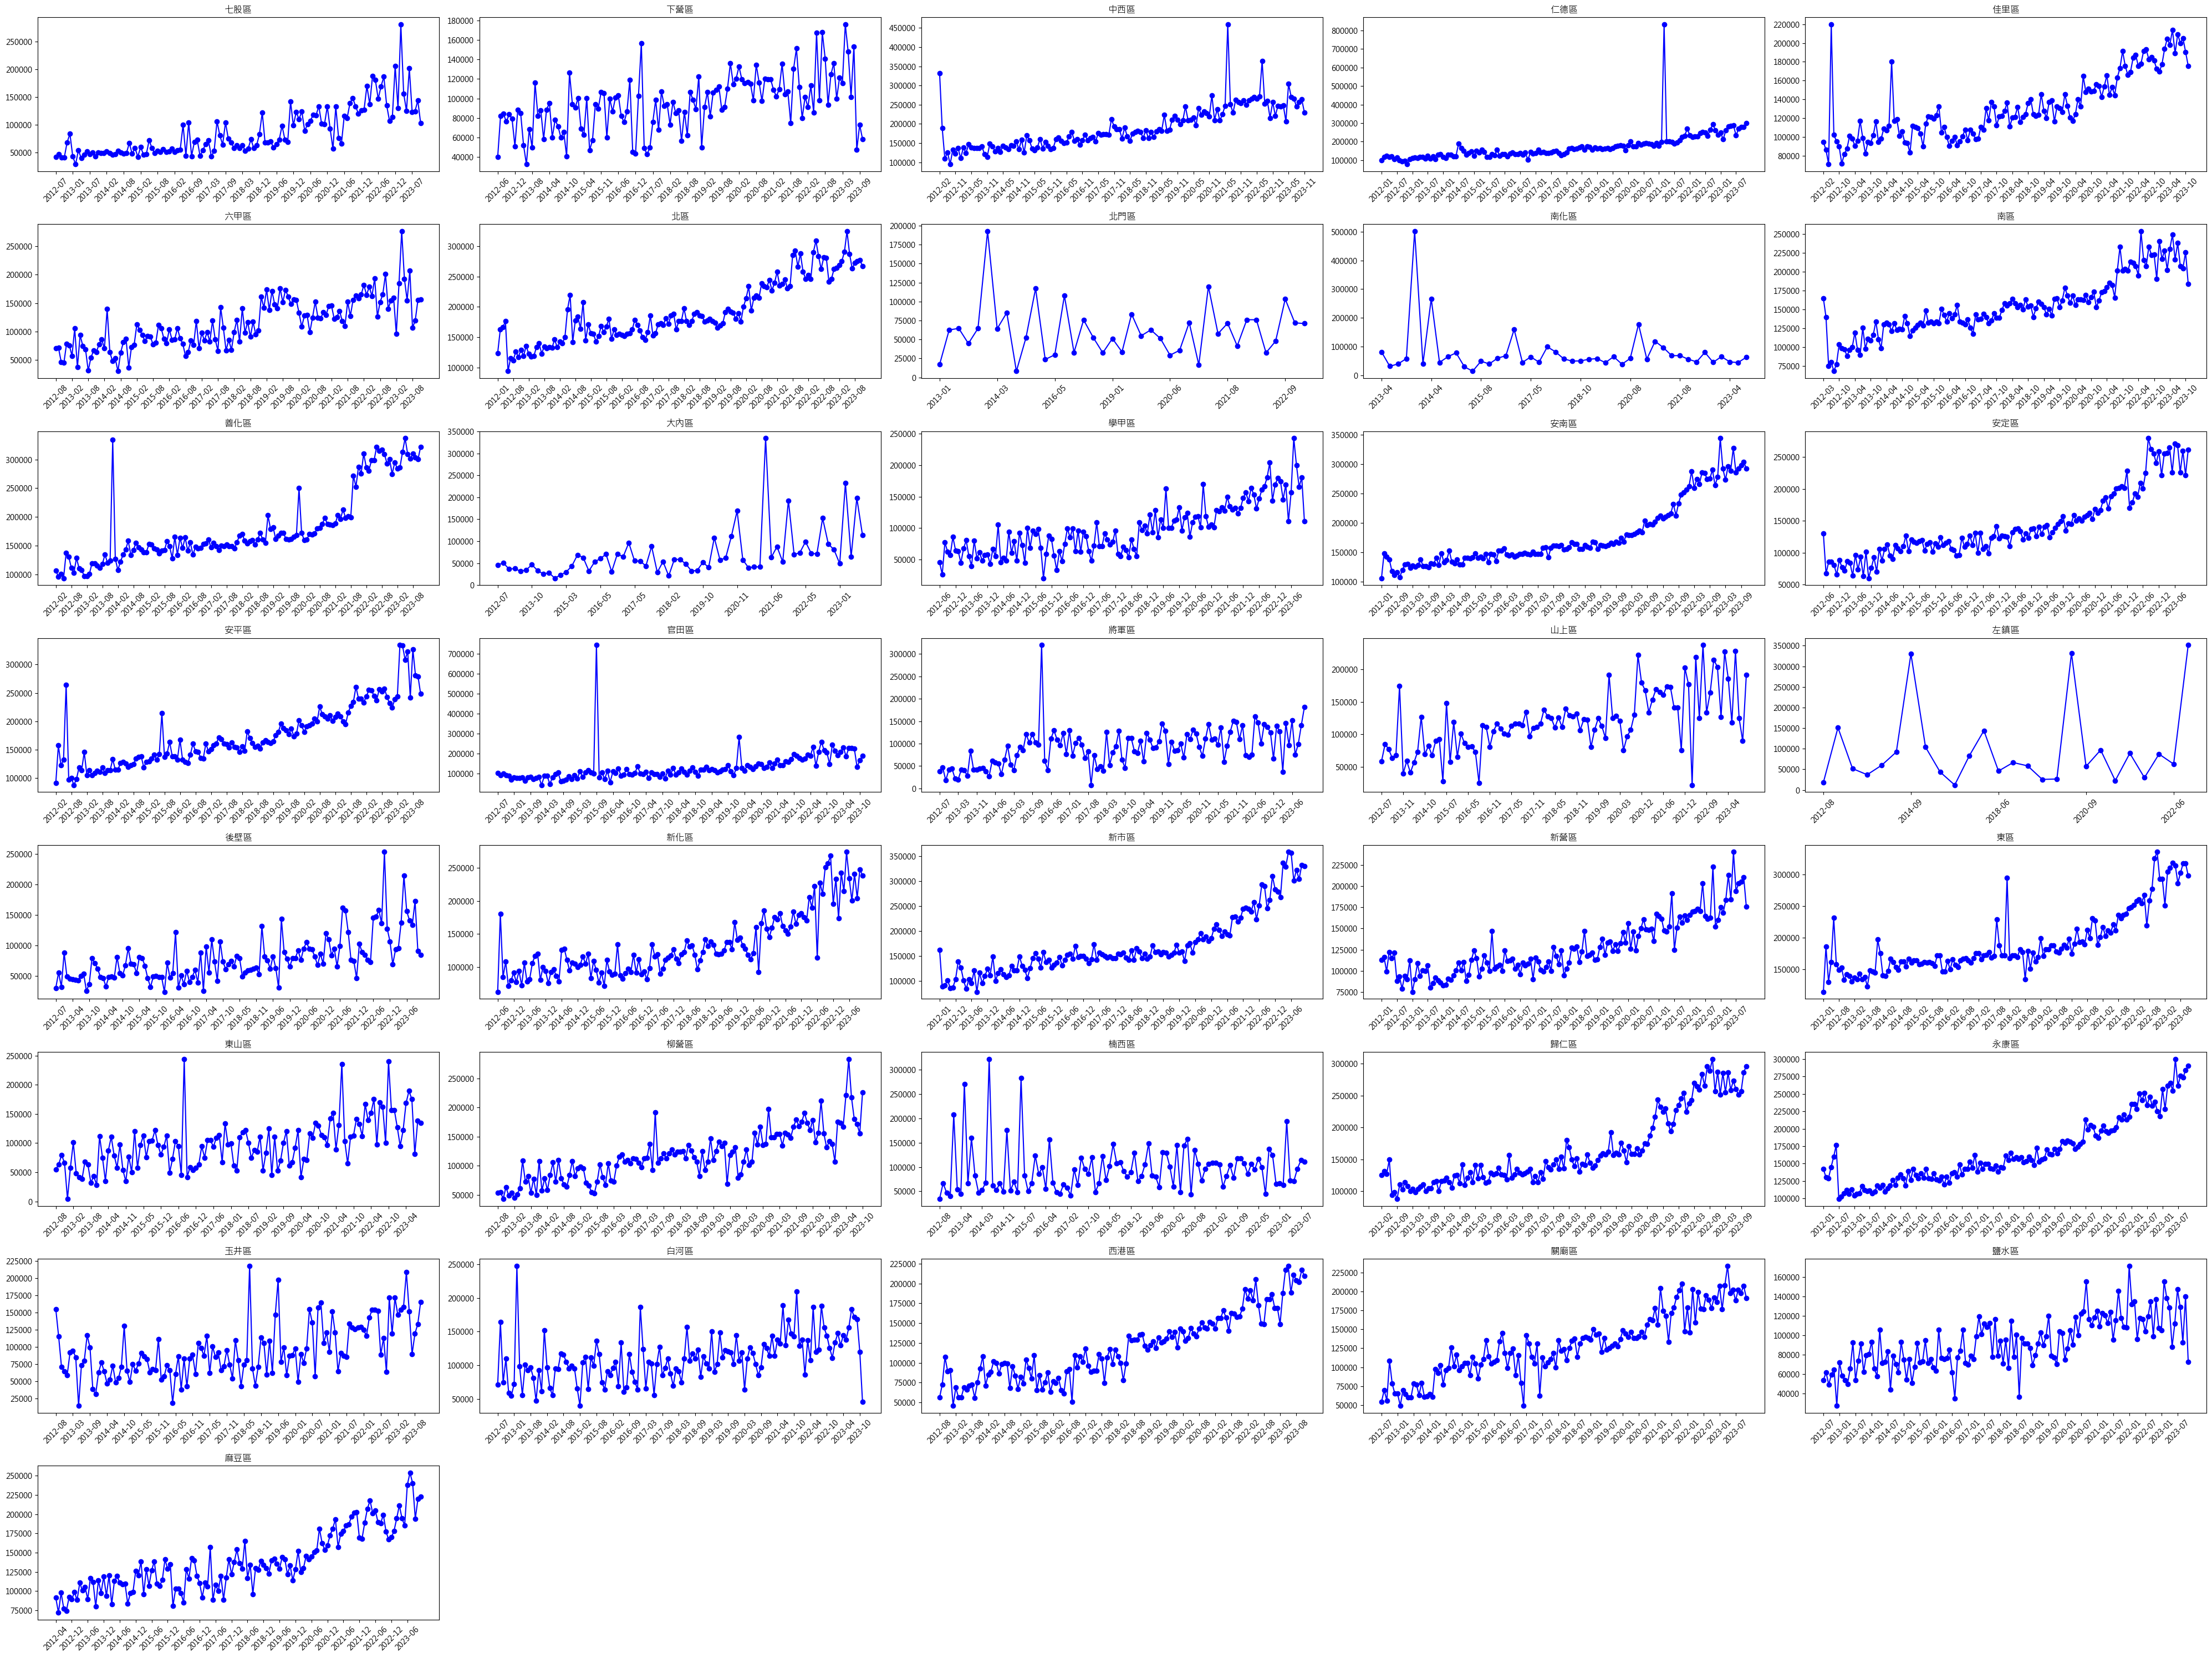

In [7]:
df_grouped_dist = df.groupby(["鄉鎮市區", "YearMonth"])["單價元每坪"].mean().reset_index()

# 獲取所有行政區名稱
districts = df_grouped_dist["鄉鎮市區"].unique()

# 創建一個大畫布，定義子圖的行數和列數
fig, axes = plt.subplots(
    nrows=8, ncols=5, figsize=(40, 30)
)  # 8行5列的子圖網格，總共40格，37個行政區

# 扁平化 axes 以便於逐個遍歷
axes = axes.flatten()

# 繪製每個行政區的折線圖，只遍歷行政區的數量
for i, district in enumerate(districts):
    ax = axes[i]  # 取得當前的子圖
    district_data = df_grouped_dist[df_grouped_dist["鄉鎮市區"] == district]

    # 畫折線圖
    ax.plot(
        district_data["YearMonth"].astype(str),
        district_data["單價元每坪"],
        marker="o",
        color="b",
    )
    ax.set_title(district)  # 設置子圖的標題為行政區名稱
    ax.set_xticks(
        district_data["YearMonth"].astype(str)[::6]
    )  # 每6個月顯示一個標籤，防止重疊
    ax.tick_params(axis="x", rotation=45)  # X軸標籤旋轉45度

# 如果子圖數量多於行政區，關閉多餘的子圖
for j in range(len(districts), len(axes)):
    fig.delaxes(axes[j])  # 刪除空白子圖

# 調整子圖之間的間距
plt.tight_layout()
plt.show()

#### 行政區與南科營業額做比較

In [9]:
# Step 1: 確保 'YearMonth' 欄位是 Period 並轉換為 Timestamp
sciencepark_data["YearMonth"] = sciencepark_data["YearMonth"].dt.to_timestamp()
df_grouped_dist["YearMonth"] = df_grouped_dist["YearMonth"].dt.to_timestamp()

# Step 2: 再確保所有的欄位都轉換成標準的 datetime 類型
sciencepark_data["YearMonth"] = pd.to_datetime(sciencepark_data["YearMonth"])
df_grouped_dist["YearMonth"] = pd.to_datetime(df_grouped_dist["YearMonth"])

# Step 3: 篩選出共有的日期，對房價數據進行過濾
df_grouped_dist_sametime = df_grouped_dist[
    df_grouped_dist["YearMonth"].isin(sciencepark_data["YearMonth"])
]

# Step 4: 同樣處理南科數據，只保留與房價數據匹配的日期
sciencepark_data_sametime = sciencepark_data[
    sciencepark_data["YearMonth"].isin(df_grouped_dist["YearMonth"])
]

# 創建一個大畫布，定義子圖的行數和列數
fig, axes = plt.subplots(
    nrows=8, ncols=5, figsize=(40, 30)
)  # 8行5列的子圖網格，總共40格，37個行政區

# 扁平化 axes 以便於逐個遍歷
axes = axes.flatten()

# 繪製每個行政區的折線圖，只遍歷行政區的數量
for i, district in enumerate(districts):
    ax = axes[i]  # 取得當前的子圖
    district_data = df_grouped_dist_sametime[
        df_grouped_dist_sametime["鄉鎮市區"] == district
    ]

    # 畫行政區的房價折線圖
    ax.plot(
        district_data["YearMonth"],
        district_data["單價元每坪"],
        marker="o",
        color="b",
        label="單價元每坪",
    )
    ax.set_title(district)  # 設置子圖的標題為行政區名稱

    # 確保 X 軸是 datetime 格式，並使用 mdates 來格式化
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # 設定X軸顯示的日期格式
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 每6個月顯示一個標籤
    ax.tick_params(axis="x", rotation=45)  # X軸標籤旋轉45度

    # 創建第二個 Y 軸，畫南科的營業額
    ax2 = ax.twinx()  # 創建共享X軸的第二個Y軸
    ax2.plot(
        sciencepark_data_sametime["YearMonth"],
        sciencepark_data_sametime["營業額總計"],
        marker="x",
        color="r",
        label="南科營業額",
    )
    ax2.set_ylabel("南科營業額", color="r")
    ax2.tick_params(axis="y", labelcolor="r")

# 如果子圖數量多於行政區，關閉多餘的子圖
for j in range(len(districts), len(axes)):
    fig.delaxes(axes[j])  # 刪除空白子圖

# 調整子圖之間的間距
plt.tight_layout()
plt.show()

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

#### 皮爾森相關係數看每個行政區與營業額的相似性

In [9]:
# 創建一個空的字典來存儲各行政區的相似性結果
similarity_dict = {}

# 針對每個行政區計算與南科營業額的相似性
for district in districts:
    # 獲取當前行政區的房價數據
    district_data = df_grouped_dist[df_grouped_dist["行政區"] == district]

    # 確保對應日期的數據匹配
    merged_data = pd.merge(
        district_data[["YearMonth", "單價元每坪"]],
        sciencepark_data[["YearMonth", "營業額總計"]],
        on="YearMonth",
        how="inner",
    )

    # 如果數據量大於一定數量，才計算相似性，避免小樣本問題
    if len(merged_data) > 2:
        # 計算皮爾森相關係數
        correlation = np.corrcoef(merged_data["單價元每坪"], merged_data["營業額總計"])[
            0, 1
        ]
        similarity_dict[district] = correlation
    else:
        similarity_dict[district] = np.nan  # 如果資料太少，返回 NaN

# 將相似性結果轉換為 DataFrame，方便查看
similarity_df = pd.DataFrame(
    list(similarity_dict.items()), columns=["行政區", "相似性"]
)
similarity_df = similarity_df.sort_values(by="相似性", ascending=False)

# 顯示結果
print(similarity_df[similarity_df["相似性"] > 0.5])

    行政區       相似性
28  歸仁區  0.874934
14  安定區  0.873612
22  新市區  0.864957
13  安南區  0.850362
10  善化區  0.842934
3   仁德區  0.820812
4   佳里區  0.810171
32  西港區  0.809246
35  麻豆區  0.803673
9    南區  0.790937
33  關廟區  0.782787
29  永康區  0.778642
21  新化區  0.773250
15  安平區  0.761625
24   東區  0.757691
16  官田區  0.747780
23  新營區  0.711426
12  學甲區  0.700677
2   中西區  0.608693
0   七股區  0.594619
20  後壁區  0.549348
6    北區  0.528966
26  柳營區  0.504331


In [10]:
len(similarity_df[similarity_df["相似性"] > 0.5])

23

In [11]:
df_region_A = df[df["Region"] == "A"]

print(df_region_A["行政區"].unique())
print(len(df_region_A["行政區"].unique()))

['安南區' '中西區' '安平區' '南區' '北區' '永康區' '新市區' '東區' '歸仁區' '仁德區' '善化區' '新化區'
 '關廟區' '西港區' '安定區' '山上區' '鹽水區' '新營區' '佳里區' '東山區' '麻豆區' '玉井區' '七股區' '下營區'
 '柳營區' '學甲區' '將軍區' '後壁區']
28


In [12]:
# 先篩選出相似性大於 0.5 的行政區
filtered_similarity_df = similarity_df[similarity_df["相似性"] > 0.5]

# 檢查 df_region_A['行政區'] 的唯一值是否存在於 similarity_df['行政區'] 中
matching_districts = df_region_A["行政區"].unique()[
    np.isin(df_region_A["行政區"].unique(), filtered_similarity_df["行政區"])
]

# 如果有匹配的行政區，則打印出來
if len(matching_districts) > 0:
    print(matching_districts)
    print(len(matching_districts))

['安南區' '中西區' '安平區' '南區' '北區' '永康區' '新市區' '東區' '歸仁區' '仁德區' '善化區' '新化區'
 '關廟區' '西港區' '安定區' '新營區' '佳里區' '麻豆區' '七股區' '柳營區' '學甲區' '後壁區']
22


In [13]:
# 找出 df_region_A['行政區'] 不存在存在於 similarity_df相似性大於 0.5 的行政區
not_matching_districts = df_region_A["行政區"].unique()[
    ~np.isin(df_region_A["行政區"].unique(), filtered_similarity_df["行政區"])
]

print(not_matching_districts)

['山上區' '鹽水區' '東山區' '玉井區' '下營區' '將軍區']


#### 透過分群結果，最大群(Region A 與房價的關係)

In [14]:
df.columns

Index(['單價元平方公尺', '編號', '單價元每坪', '屋齡區間', '交易年月日', '建物移轉總面積平方公尺', '有無管理組織',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農',
       'good_count_500', 'bad_count_500', 'good_count_1000', 'bad_count_1000',
       'good_count_1500', 'bad_count_1500', '行政區', '屋齡類別', 'Close_TW',
       'Close_2330', '疫情爆發後', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', 'Region',
       'YearMonth'],
      dtype='object')

In [15]:
df_region_A = df[df["Region"] == "A"]

print(df_region_A["行政區"].unique())

['安南區' '中西區' '安平區' '南區' '北區' '永康區' '新市區' '東區' '歸仁區' '仁德區' '善化區' '新化區'
 '關廟區' '西港區' '安定區' '山上區' '鹽水區' '新營區' '佳里區' '東山區' '麻豆區' '玉井區' '七股區' '下營區'
 '柳營區' '學甲區' '將軍區' '後壁區']


C:\Users\student\AppData\Local\Temp\ipykernel_12408\303305667.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grouped_A.index.astype(str), rotation=45, ha="right")


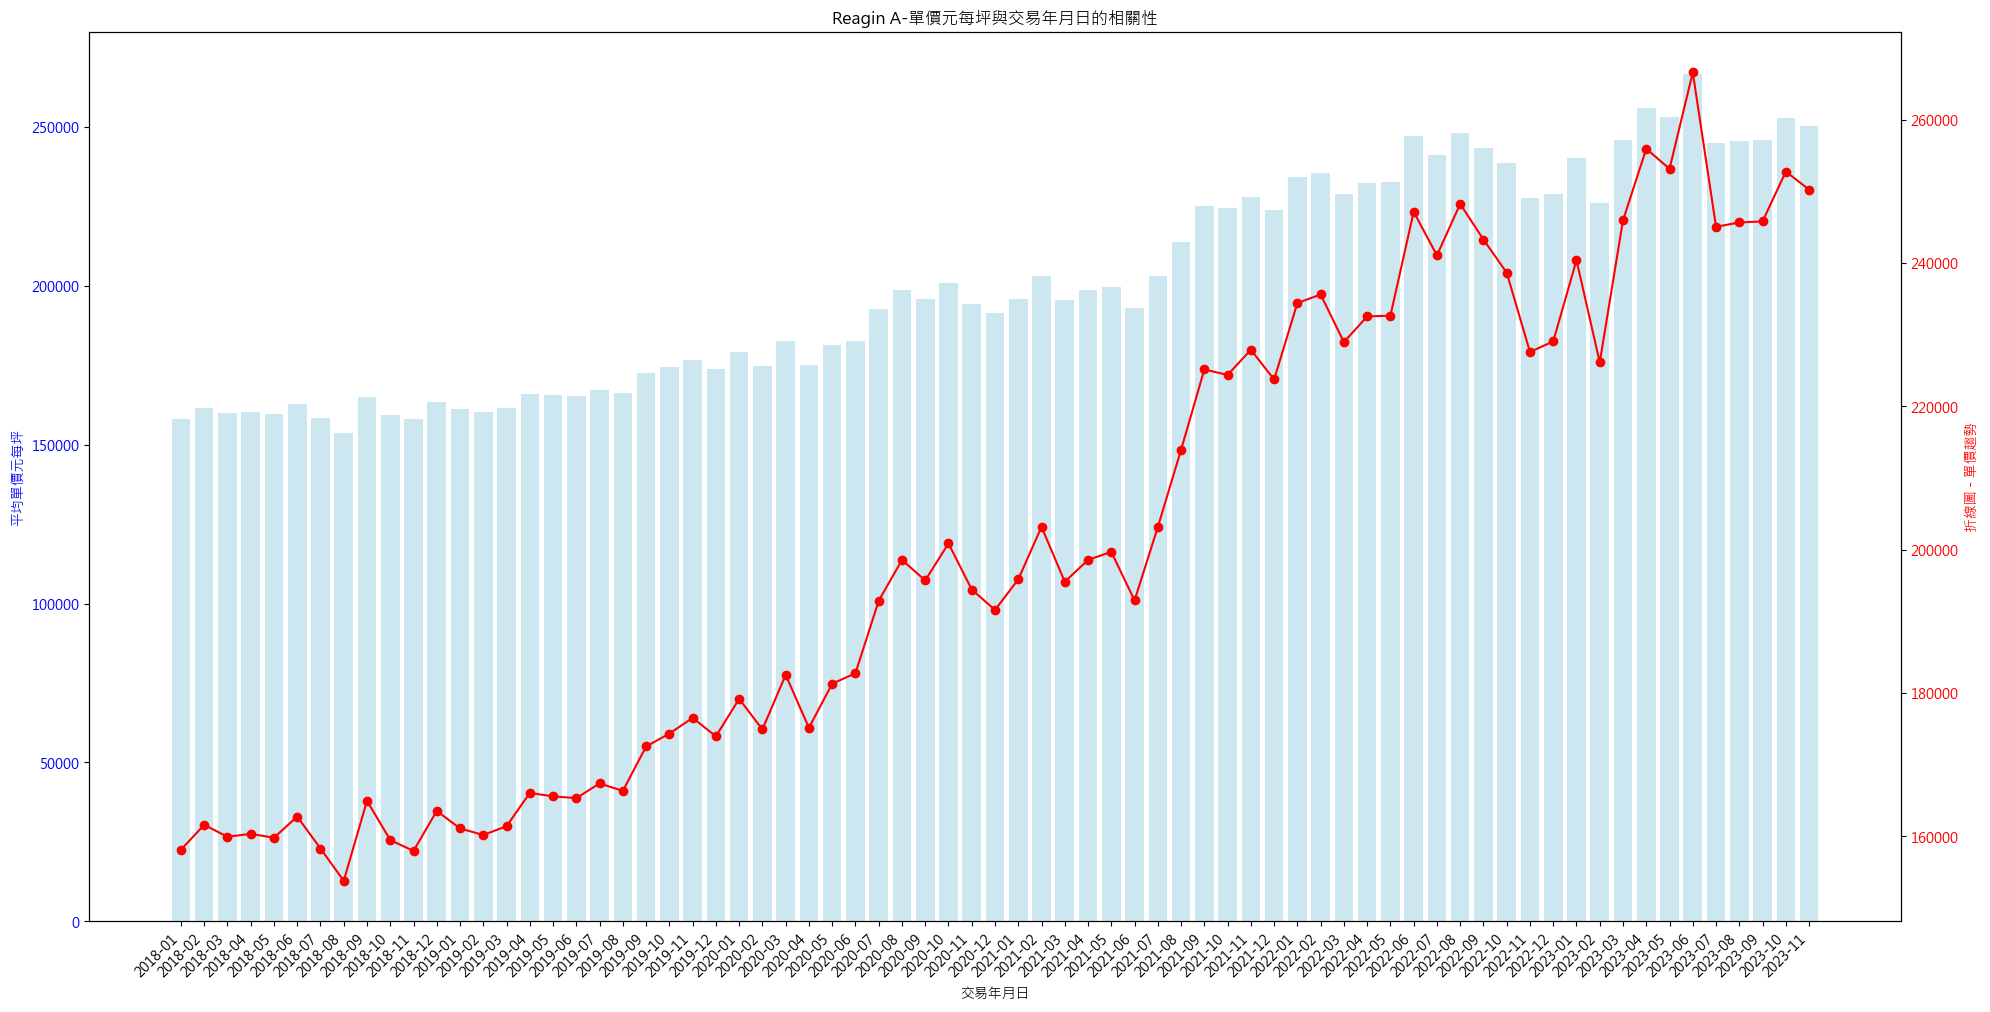

In [16]:
df_grouped_A = df[df["Region"] == "A"].groupby("YearMonth")["單價元每坪"].mean()

# 繪圖
fig, ax1 = plt.subplots(figsize=(20, 10))

# 畫長條圖 - 使用第一個坐標軸
ax1.bar(
    df_grouped_A.index.astype(str),
    df_grouped_A,
    color="lightblue",
    alpha=0.6,
    label="單價元每坪",
)
ax1.set_xlabel("交易年月日")
ax1.set_ylabel("平均單價元每坪", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(df_grouped_A.index.astype(str), rotation=45, ha="right")

# 創建第二個坐標軸，畫折線圖
ax2 = ax1.twinx()
ax2.plot(
    df_grouped_A.index.astype(str),
    df_grouped_A,
    color="red",
    marker="o",
    label="單價走勢",
)
ax2.set_ylabel("折線圖 - 單價趨勢", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# 顯示圖例
fig.tight_layout()
plt.title("Reagin A-單價元每坪與交易年月日的相關性")
plt.show()

### 與總體經濟關係

In [17]:
df["YearMonth"]

0         2018-01
1         2018-01
2         2018-01
3         2018-01
4         2018-01
           ...   
132066    2023-11
132067    2023-11
132068    2023-11
132069    2023-11
132070    2023-11
Name: YearMonth, Length: 132071, dtype: period[M]

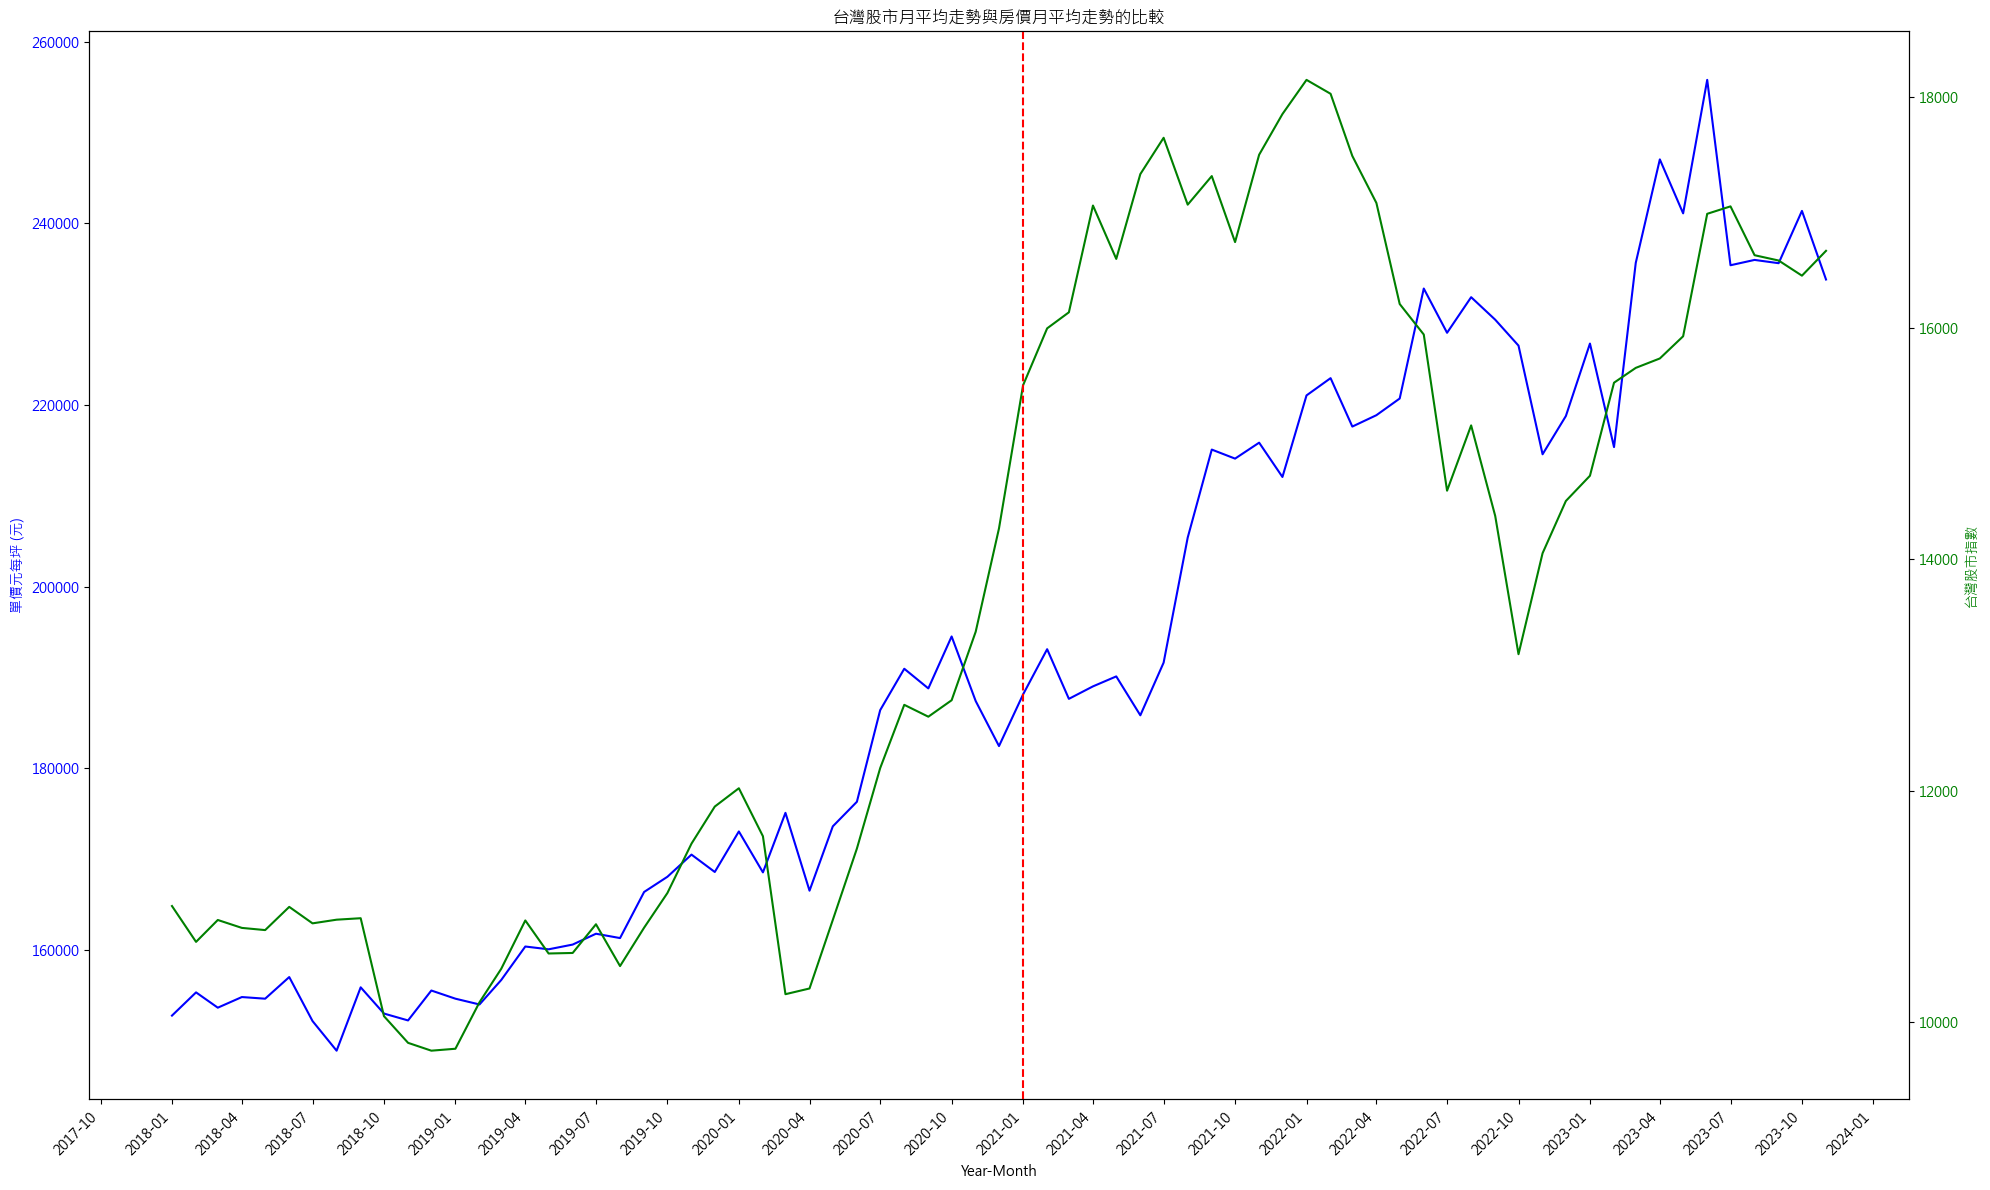

In [21]:
# 計算每個月份的平均股價和平均房價
df_monthly = (
    df.groupby("YearMonth")
    .agg({"Close_TW": "mean", "單價元每坪": "mean"})
    .reset_index()
)

# 將 YearMonth 轉換回 datetime 格式以便於處理 axvline 和繪圖
df_monthly["YearMonth"] = df_monthly["YearMonth"].dt.to_timestamp()

# 創建雙 Y 軸的圖表
fig, ax1 = plt.subplots(figsize=(20, 12))

# 繪製房價折線圖 (左Y軸)
ax1.plot(
    df_monthly["YearMonth"], df_monthly["單價元每坪"], color="b", label="房價 (每坪)"
)
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("單價元每坪 (元)", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# 使用 matplotlib.dates 格式化 X 軸標籤
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每 3 個月顯示一次標籤
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45, ha="right")

# 繪製台灣股市折線圖 (右Y軸)
ax2 = ax1.twinx()
ax2.plot(
    df_monthly["YearMonth"], df_monthly["Close_TW"], color="g", label="台灣股市月平均"
)
ax2.set_ylabel("台灣股市指數", color="g")
ax2.tick_params(axis="y", labelcolor="g")

# 加入垂直線，表示疫情爆發的時間點
plt.axvline(
    x=pd.to_datetime("2021-01-01"), color="red", linestyle="--", label="疫情爆發"
)

# 添加標題
plt.title("台灣股市月平均走勢與房價月平均走勢的比較")

# 顯示圖例
fig.tight_layout()

# 顯示圖表
plt.show()

In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 確保時間數據和價格數據格式正確
# df["交易年月日"] = pd.to_datetime(df["交易年月日"], errors="coerce")
# df["單價元每坪"] = pd.to_numeric(df["單價元每坪"], errors="coerce")

# # 按時間排序數據
# df_sorted = df.sort_values(by="交易年月日")

# # 繪製折線圖，根據交易時間來繪製房價趨勢
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="交易年月日", y="單價元每坪", hue="疫情爆發後", data=df_sorted)

# # 加入垂直線，表示疫情爆發的時間點
# plt.axvline(
#     x=pd.to_datetime("2021-01-01"), color="red", linestyle="--", label="疫情爆發"
# )

# # 設置圖表標題和軸標籤
# plt.title("疫情爆發前後房價趨勢")
# plt.xlabel("交易年月日")
# plt.ylabel("單價元每坪 (元)")

# # 顯示圖例
# plt.legend()

# # 顯示圖表
# plt.show()

#### 查看屋齡區間與房價每坪的相關性

In [23]:
df.columns

Index(['單價元平方公尺', '編號', '單價元每坪', '屋齡區間', '交易年月日', '建物移轉總面積平方公尺', '有無管理組織',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農',
       'good_count_500', 'bad_count_500', 'good_count_1000', 'bad_count_1000',
       'good_count_1500', 'bad_count_1500', '行政區', '屋齡類別', 'Close_TW',
       'Close_2330', '疫情爆發後', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', 'Region',
       'YearMonth'],
      dtype='object')

In [24]:
df["屋齡區間"]

0         21年以上－未滿30年
1               30年以上
2         21年以上－未滿30年
3         21年以上－未滿30年
4                未滿3年
             ...     
132066          30年以上
132067    21年以上－未滿30年
132068    12年以上－未滿21年
132069    21年以上－未滿30年
132070     3年以上－未滿12年
Name: 屋齡區間, Length: 132071, dtype: object

In [10]:
df_encoded_age = pd.get_dummies(df, columns=["屋齡區間"])
df_encoded_age.head()

,鄉鎮市區,土地位置建物門牌,交易年月日,建築完成年月,建物移轉總面積平方公尺,有無管理組織,總價元,單價元平方公尺,備註,編號,...,交易年份,建築完成年,交易年_民國,屋齡,YearMonth,屋齡區間_12年以上－未滿21年,屋齡區間_21年以上－未滿30年,屋齡區間_30年以上,屋齡區間_3年以上－未滿12年,屋齡區間_未滿3年
0,中西區,臺南市中西區金華路三段２１８號十五樓之１７,2022-09-02,840704.0,43.51,有,2170000,49874.0,NaN,RPVOMLLJRHHGFAD08DA,...,2022,84,111,27,2022-09,False,True,False,False,False
1,北區,臺南市北區南園街１２７巷１５１弄３號,2022-08-01,640322.0,69.20,無,4500000,65029.0,NaN,RPOOMLSJQHHGFAD97DA,...,2022,64,111,47,2022-08,False,False,True,False,False
2,佳里區,臺南市佳里區麻興路二段５３１號,2022-08-04,890919.0,130.97,無,8440000,64442.0,親友、員工、共有人或其他特殊關係間之交易；,RPQNMLKKQHHGFGD97DA,...,2022,89,111,22,2022-08,False,True,False,False,False
3,新化區,臺南市新化區中正路６６２巷２２號,2022-08-01,650600.0,110.40,無,1200000,10870.0,親友、員工、共有人或其他特殊關係間之交易；,RPSOMLPJQHHGFHD78DA,...,2022,65,111,46,2022-08,False,False,True,False,False
4,中西區,臺南市中西區南寧街１３６巷９號,2022-08-01,510000.0,81.05,無,10600000,130783.0,NaN,RPPNMLKKQHHGFAD37EA,...,2022,51,111,60,2022-08,False,False,True,False,False


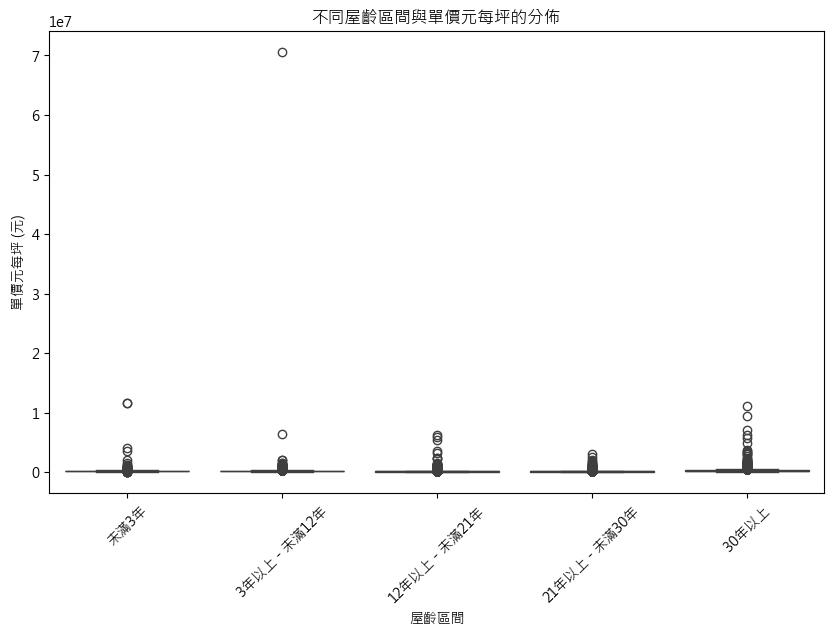

In [11]:
# 自定義屋齡區間的順序
age_order = [
    "未滿3年",
    "3年以上－未滿12年",
    "12年以上－未滿21年",
    "21年以上－未滿30年",
    "30年以上",
]

# 將屋齡區間設置為有序類別
df["屋齡區間"] = pd.Categorical(df["屋齡區間"], categories=age_order, ordered=True)

# 繪製箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(x="屋齡區間", y="單價元每坪", data=df)

# 設置圖表標題和軸標籤
plt.title("不同屋齡區間與單價元每坪的分佈")
plt.xlabel("屋齡區間")
plt.ylabel("單價元每坪 (元)")

# 旋轉 x 軸的標籤，避免重疊
plt.xticks(rotation=45)

# 顯示圖表
plt.show()

#### 住宅型態與房價關係

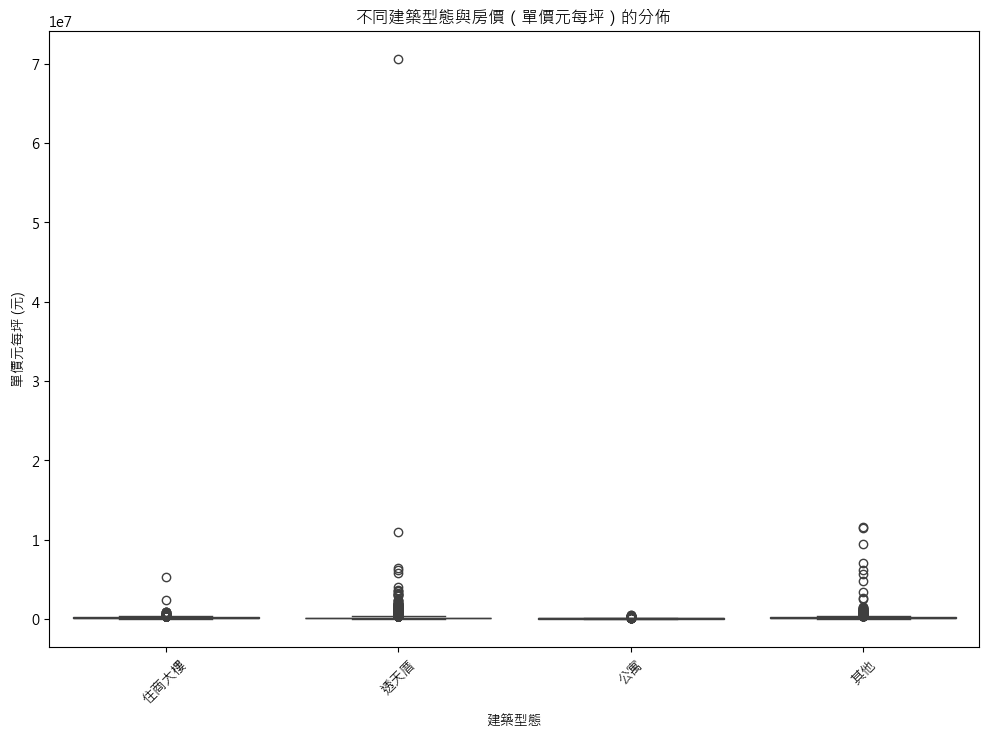

In [14]:
# 繪製箱型圖
plt.figure(figsize=(12, 8))
sns.boxplot(x="建築型態清整", y="單價元每坪", data=df)

# 設置標題和軸標籤
plt.title("不同建築型態與房價（單價元每坪）的分佈")
plt.xlabel("建築型態")
plt.ylabel("單價元每坪 (元)")

# 旋轉 x 軸標籤避免重疊
plt.xticks(rotation=45)

plt.show()

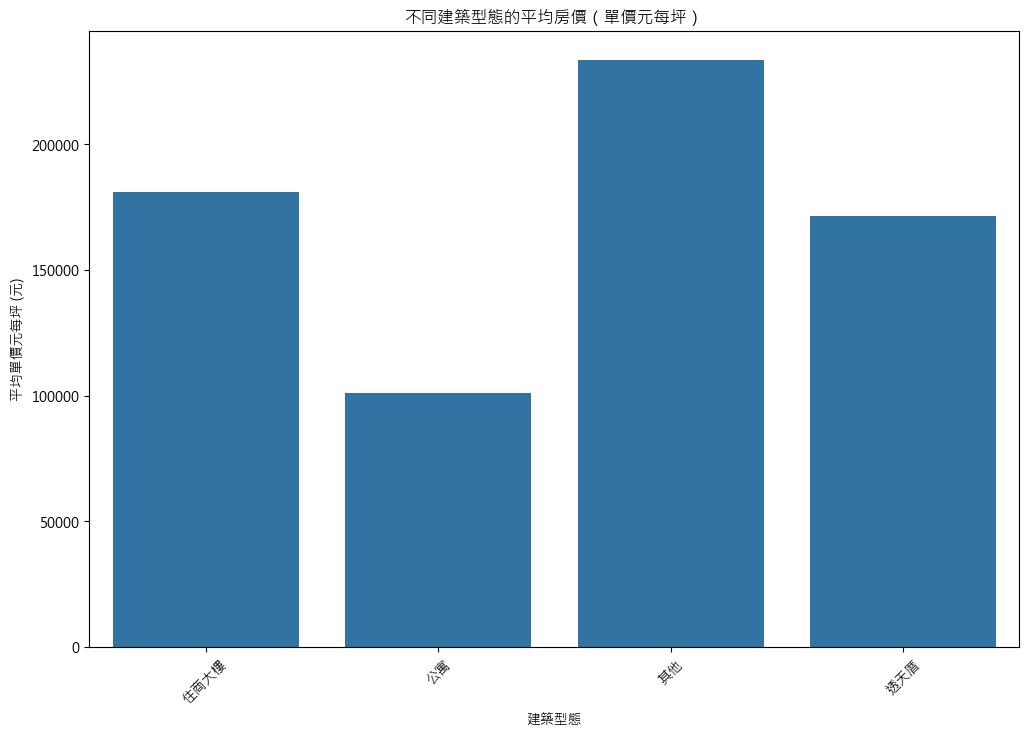

In [13]:
# 計算每種建築型態的平均房價
avg_price_by_type = df.groupby("建築型態清整")["單價元每坪"].mean().reset_index()

# 繪製柱狀圖
plt.figure(figsize=(12, 8))
sns.barplot(x="建築型態清整", y="單價元每坪", data=avg_price_by_type)

# 設置標題和軸標籤
plt.title("不同建築型態的平均房價（單價元每坪）")
plt.xlabel("建築型態")
plt.ylabel("平均單價元每坪 (元)")

# 旋轉 x 軸標籤避免重疊
plt.xticks(rotation=45)

plt.show()

#### 房屋格局與房價關係(主成分分析)

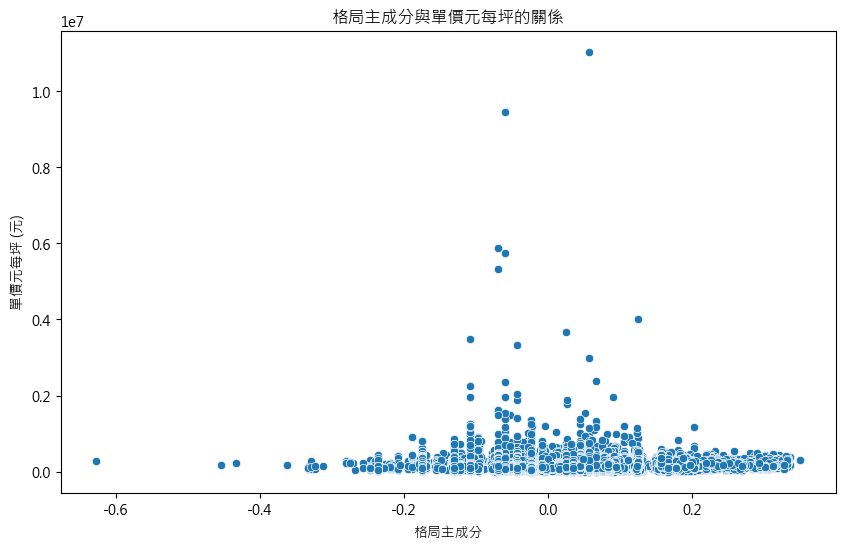

In [15]:
from sklearn.decomposition import PCA

# 選擇要進行 PCA 的欄位，並過濾掉 NaN 值
pca_features = df[
    ["格局比例_房", "格局比例_廳", "格局比例_衛", "格局比例_隔間"]
].dropna()

# 初始化 PCA，將三個特徵壓縮為一個主成分
pca = PCA(n_components=1)
pca_result = pca.fit_transform(pca_features)

# 創建一個新的 DataFrame 存放 PCA 結果
pca_df = df[["單價元每坪"]].loc[pca_features.index].copy()  # 保留原始數據
pca_df["格局主成分"] = pca_result  # 加入 PCA 結果

# 繪製散佈圖，查看壓縮後的主成分與房價之間的關係
plt.figure(figsize=(10, 6))
sns.scatterplot(x="格局主成分", y="單價元每坪", data=pca_df)
plt.title("格局主成分與單價元每坪的關係")
plt.xlabel("格局主成分")
plt.ylabel("單價元每坪 (元)")
plt.show()

In [45]:
import statsmodels.api as sm

# 選擇自變量和因變量
X = df[["格局比例_房", "格局比例_廳", "格局比例_衛", "格局比例_隔間"]].dropna()
# 確保 y 的索引與 X 對齊
y = df["單價元每坪"].loc[X.index]

# 添加常數項以適應線性回歸模型
X = sm.add_constant(X)

# 建立線性回歸模型
model = sm.OLS(y, X).fit()

# 輸出回歸結果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  單價元每坪   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2615.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:17:29   Log-Likelihood:            -1.6267e+06
No. Observations:              129717   AIC:                         3.253e+06
Df Residuals:                  129713   BIC:                         3.253e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.536e+05    389.772    394.015      0.0

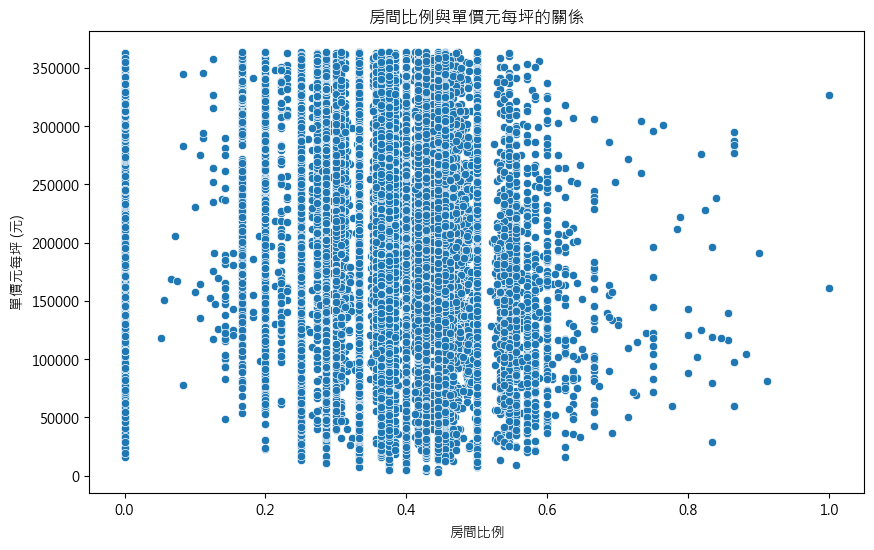

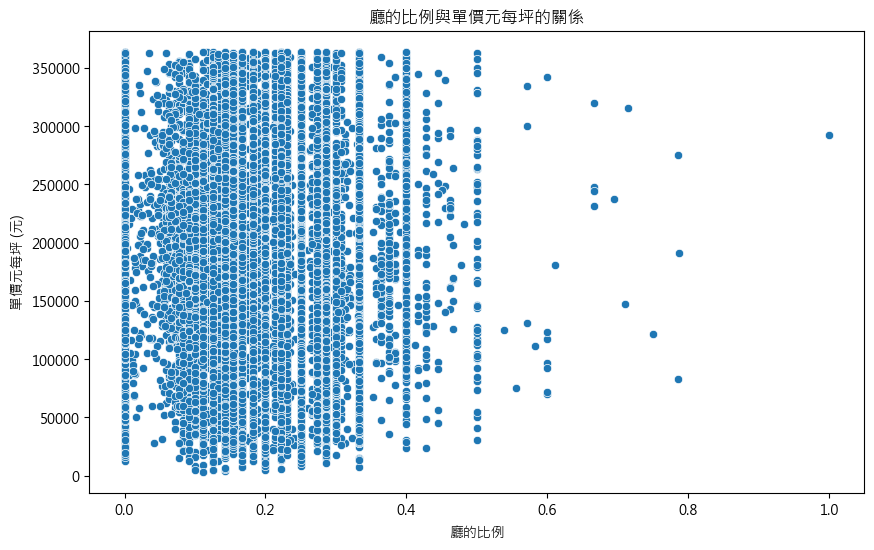

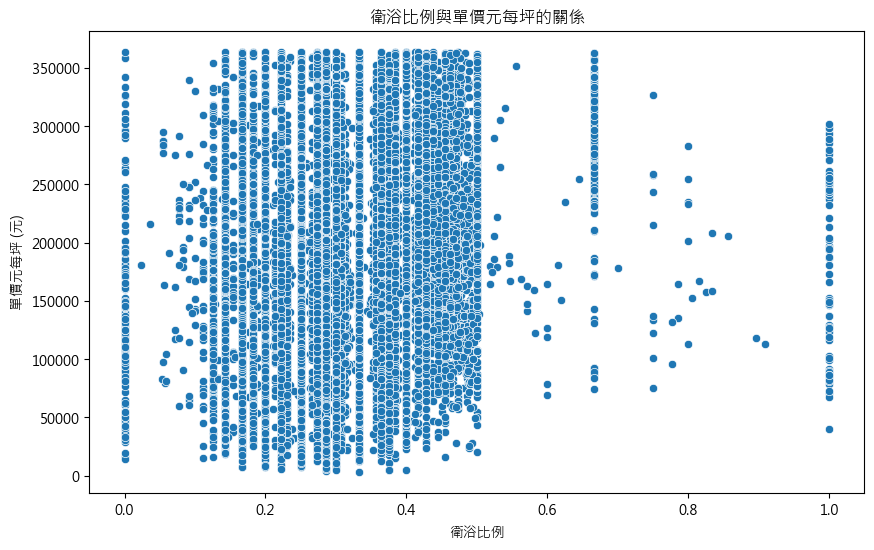

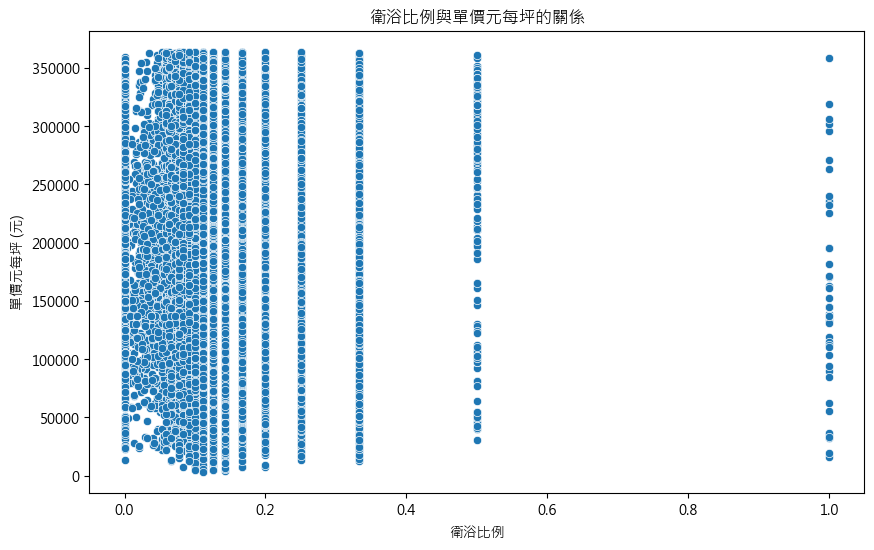

In [46]:
# 繪製「格局比例_房」與「單價元每坪」的散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x="格局比例_房", y="單價元每坪", data=df)
plt.title("房間比例與單價元每坪的關係")
plt.xlabel("房間比例")
plt.ylabel("單價元每坪 (元)")
plt.show()

# 繪製「格局比例_廳」與「單價元每坪」的散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x="格局比例_廳", y="單價元每坪", data=df)
plt.title("廳的比例與單價元每坪的關係")
plt.xlabel("廳的比例")
plt.ylabel("單價元每坪 (元)")
plt.show()

# 繪製「格局比例_衛」與「單價元每坪」的散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x="格局比例_衛", y="單價元每坪", data=df)
plt.title("衛浴比例與單價元每坪的關係")
plt.xlabel("衛浴比例")
plt.ylabel("單價元每坪 (元)")
plt.show()

# 繪製「格局比例_衛」與「單價元每坪」的散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x="格局比例_隔間", y="單價元每坪", data=df)
plt.title("衛浴比例與單價元每坪的關係")
plt.xlabel("衛浴比例")
plt.ylabel("單價元每坪 (元)")
plt.show()

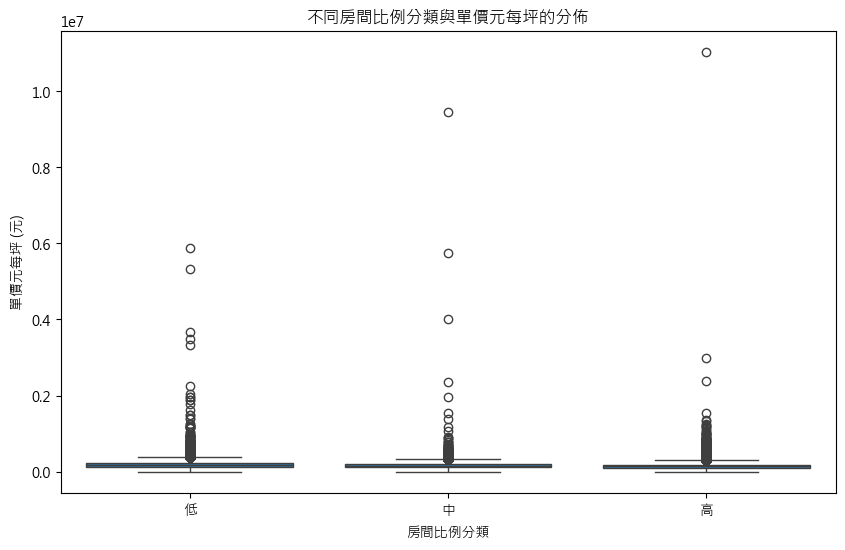

In [16]:
# 將格局比例_房進行離散化處理（將比例分為 3 組）
df["房間比例分類"] = pd.qcut(df["格局比例_房"], q=3, labels=["低", "中", "高"])

# 繪製箱型圖來顯示不同房間比例分類的房價分佈
plt.figure(figsize=(10, 6))
sns.boxplot(x="房間比例分類", y="單價元每坪", data=df)
plt.title("不同房間比例分類與單價元每坪的分佈")
plt.xlabel("房間比例分類")
plt.ylabel("單價元每坪 (元)")
plt.show()

#### 建物移轉總面積與房價每坪關係

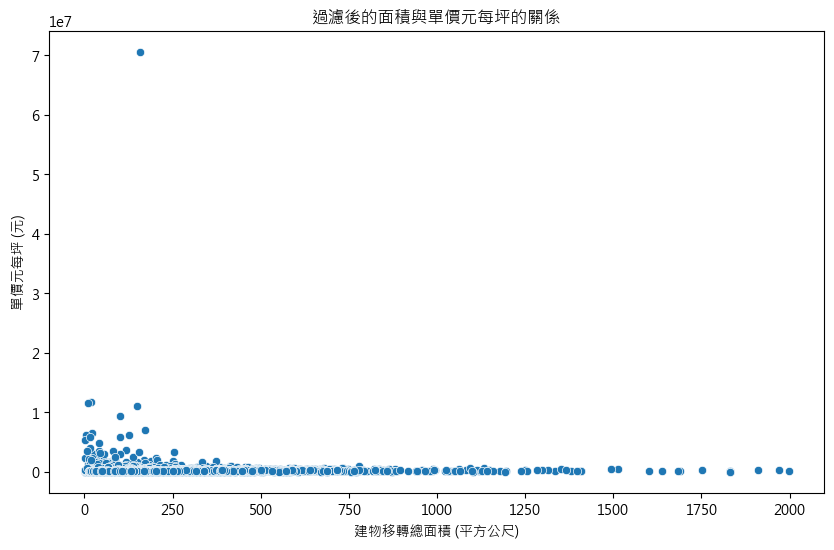

In [17]:
# 設定一個面積的上限，例如過濾掉面積大於 2000 平方公尺的數據
filtered_land_df = df[df["建物移轉總面積平方公尺"] <= 2000]

# 繪製過濾後的散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x="建物移轉總面積平方公尺", y="單價元每坪", data=filtered_land_df)
plt.title("過濾後的面積與單價元每坪的關係")
plt.xlabel("建物移轉總面積 (平方公尺)")
plt.ylabel("單價元每坪 (元)")
plt.show()

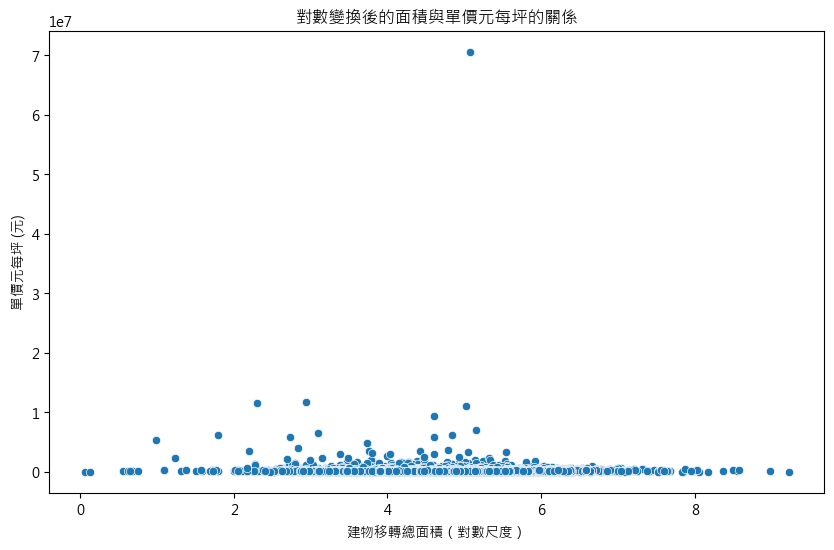

In [18]:
import numpy as np

# 對面積進行對數變換，並處理面積為 0 的數據
df["建物移轉總面積平方公尺_log"] = np.log1p(
    df["建物移轉總面積平方公尺"]
)  # log1p 可以避免 log(0) 的錯誤

# 繪製對數變換後的散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x="建物移轉總面積平方公尺_log", y="單價元每坪", data=df)
plt.title("對數變換後的面積與單價元每坪的關係")
plt.xlabel("建物移轉總面積（對數尺度）")
plt.ylabel("單價元每坪 (元)")
plt.show()

#### 車位

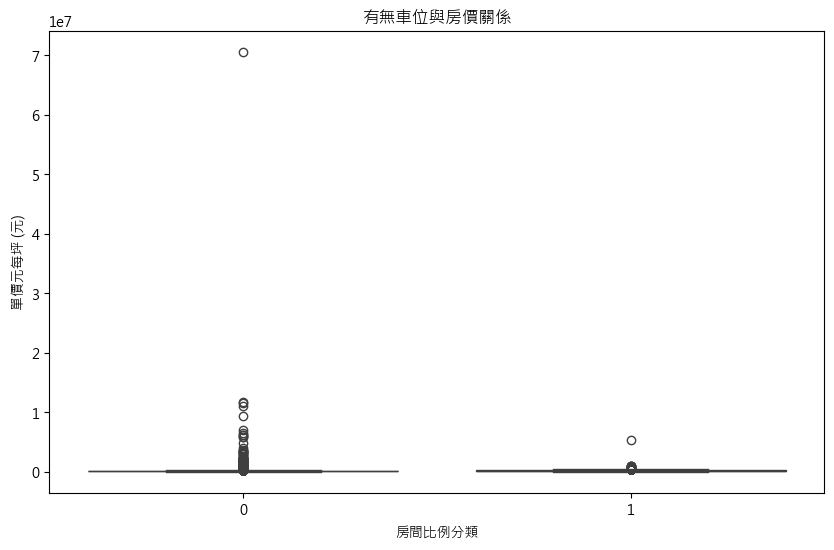

In [19]:
# 繪製箱型圖來顯示不同房間比例分類的房價分佈
plt.figure(figsize=(10, 6))
sns.boxplot(x="是否包含車位", y="單價元每坪", data=df)
plt.title("有無車位與房價關係")
plt.xlabel("房間比例分類")
plt.ylabel("單價元每坪 (元)")
plt.show()

#### 建物工法

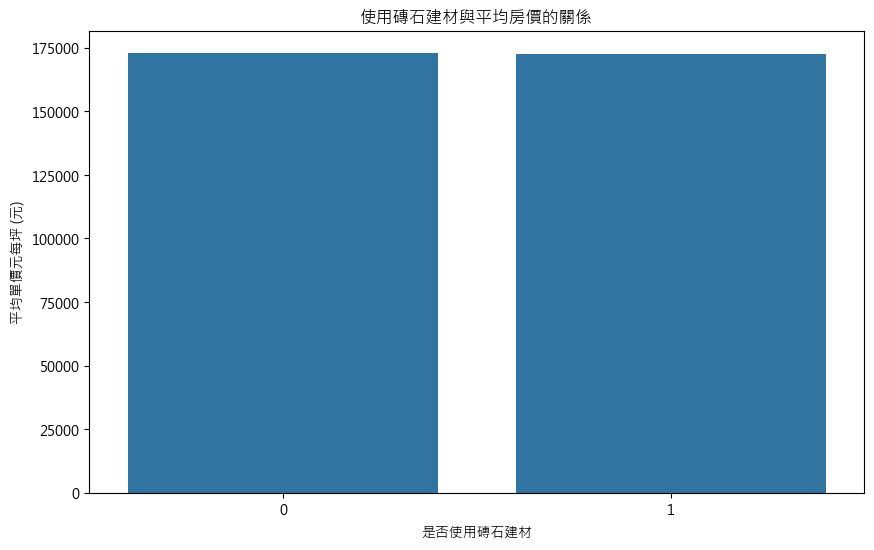

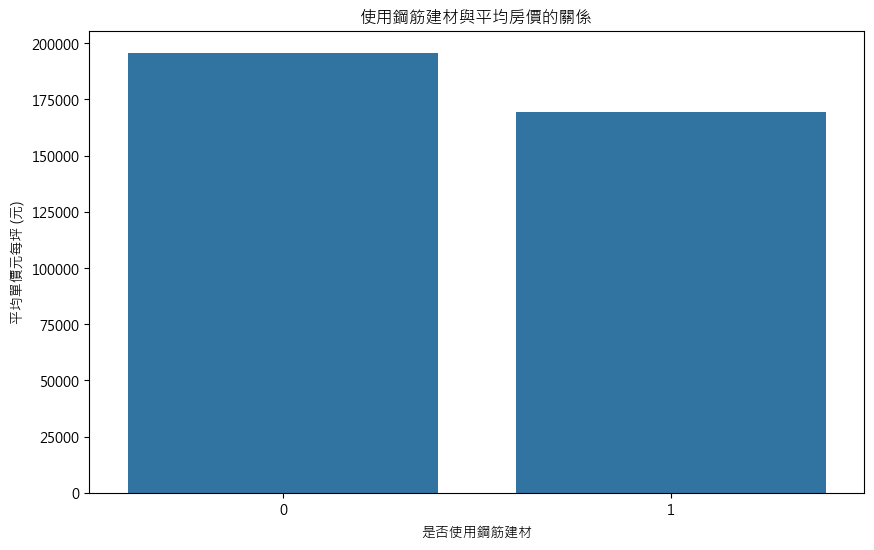

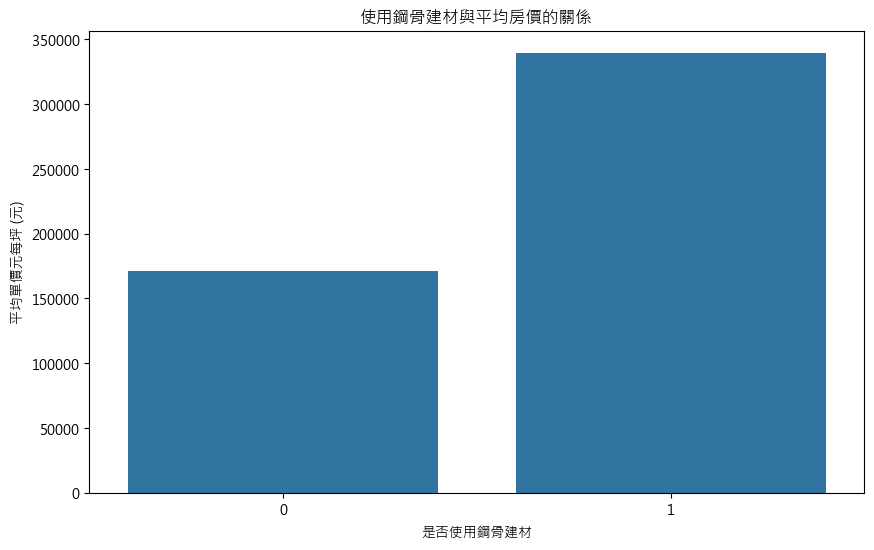

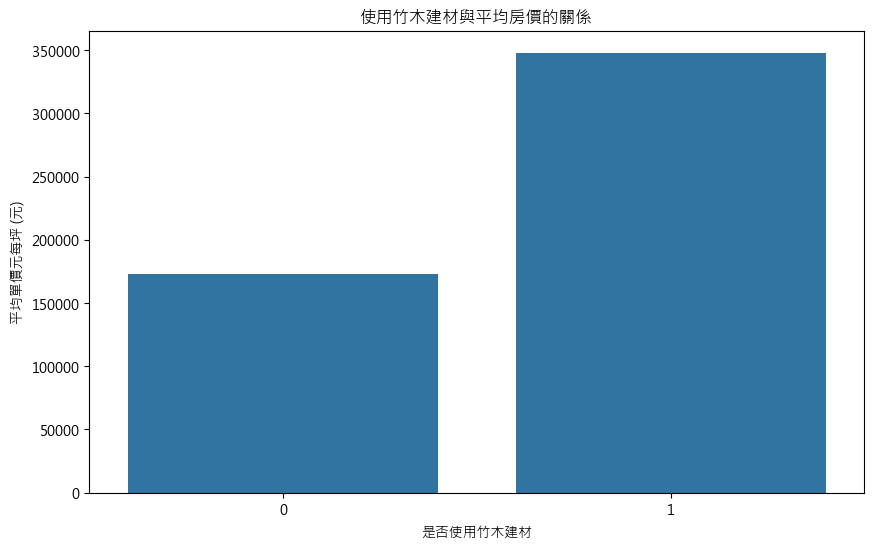

In [20]:
# 計算每種建材使用情況下的平均房價
brick_avg_price = df.groupby("建材_磚石")["單價元每坪"].mean().reset_index()
steel_avg_price = df.groupby("建材_鋼筋")["單價元每坪"].mean().reset_index()
steel_frame_avg_price = df.groupby("建材_鋼骨")["單價元每坪"].mean().reset_index()
bamboo_avg_price = df.groupby("建材_竹木")["單價元每坪"].mean().reset_index()

# 繪製「建材_磚石」與房價的柱狀圖
plt.figure(figsize=(10, 6))
sns.barplot(x="建材_磚石", y="單價元每坪", data=brick_avg_price)
plt.title("使用磚石建材與平均房價的關係")
plt.xlabel("是否使用磚石建材")
plt.ylabel("平均單價元每坪 (元)")
plt.show()

# 繪製「建材_鋼筋」與房價的柱狀圖
plt.figure(figsize=(10, 6))
sns.barplot(x="建材_鋼筋", y="單價元每坪", data=steel_avg_price)
plt.title("使用鋼筋建材與平均房價的關係")
plt.xlabel("是否使用鋼筋建材")
plt.ylabel("平均單價元每坪 (元)")
plt.show()

# 繪製「建材_鋼骨」與房價的柱狀圖
plt.figure(figsize=(10, 6))
sns.barplot(x="建材_鋼骨", y="單價元每坪", data=steel_frame_avg_price)
plt.title("使用鋼骨建材與平均房價的關係")
plt.xlabel("是否使用鋼骨建材")
plt.ylabel("平均單價元每坪 (元)")
plt.show()

# 繪製「建材_竹木」與房價的柱狀圖
plt.figure(figsize=(10, 6))
sns.barplot(x="建材_竹木", y="單價元每坪", data=bamboo_avg_price)
plt.title("使用竹木建材與平均房價的關係")
plt.xlabel("是否使用竹木建材")
plt.ylabel("平均單價元每坪 (元)")
plt.show()

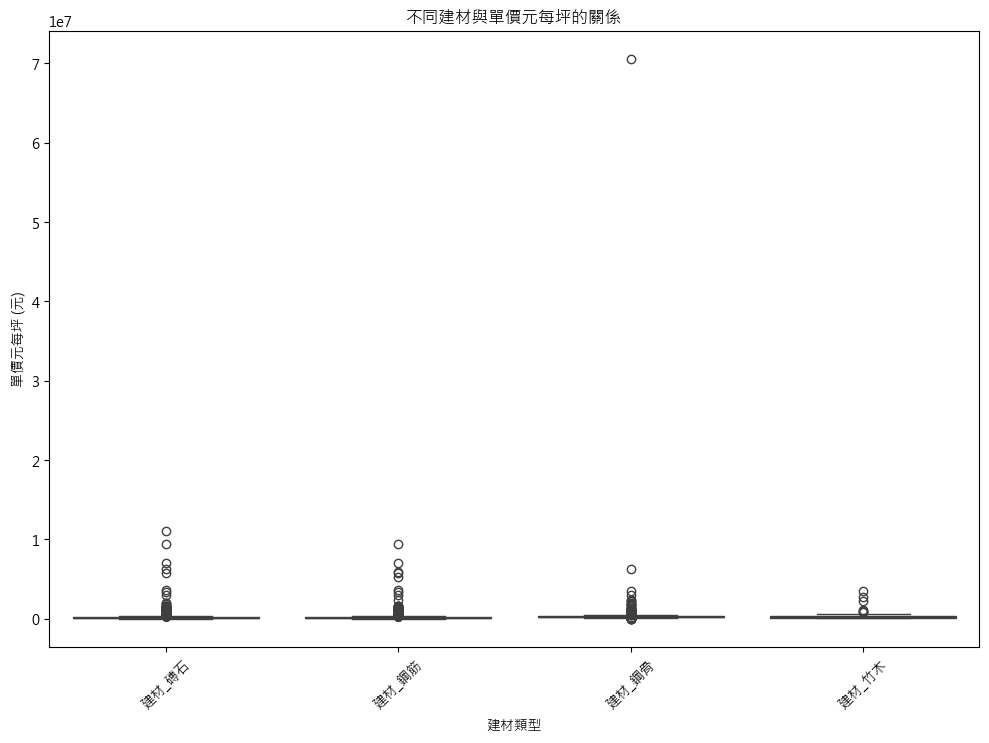

In [21]:
# 過濾掉未使用建材的行，只保留有使用的建材
df_material_filtered = df[
    (df["建材_磚石"] == 1)
    | (df["建材_鋼筋"] == 1)
    | (df["建材_鋼骨"] == 1)
    | (df["建材_竹木"] == 1)
]

# 將多個建材列轉換為長格式，方便繪圖
df_melted = df_material_filtered.melt(
    id_vars="單價元每坪",
    value_vars=["建材_磚石", "建材_鋼筋", "建材_鋼骨", "建材_竹木"],
    var_name="建材類型",
    value_name="是否使用建材",
)

# 過濾掉「未使用建材」的行
df_melted = df_melted[df_melted["是否使用建材"] == 1]

# 繪製箱型圖，顯示不同建材的房價分佈
plt.figure(figsize=(12, 8))
sns.boxplot(x="建材類型", y="單價元每坪", data=df_melted)
plt.title("不同建材與單價元每坪的關係")
plt.xlabel("建材類型")
plt.ylabel("單價元每坪 (元)")
plt.xticks(rotation=45)
plt.show()

In [51]:
df.columns

Index(['單價元平方公尺', '編號', '單價元每坪', '屋齡區間', '交易年月日', '建物移轉總面積平方公尺', '有無管理組織',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農',
       'good_count_500', 'bad_count_500', 'good_count_1000', 'bad_count_1000',
       'good_count_1500', 'bad_count_1500', '行政區', '屋齡類別', 'Close_TW',
       'Close_2330', '疫情爆發後', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', 'Region',
       'YearMonth', '房間比例分類', '建物移轉總面積平方公尺_log'],
      dtype='object')

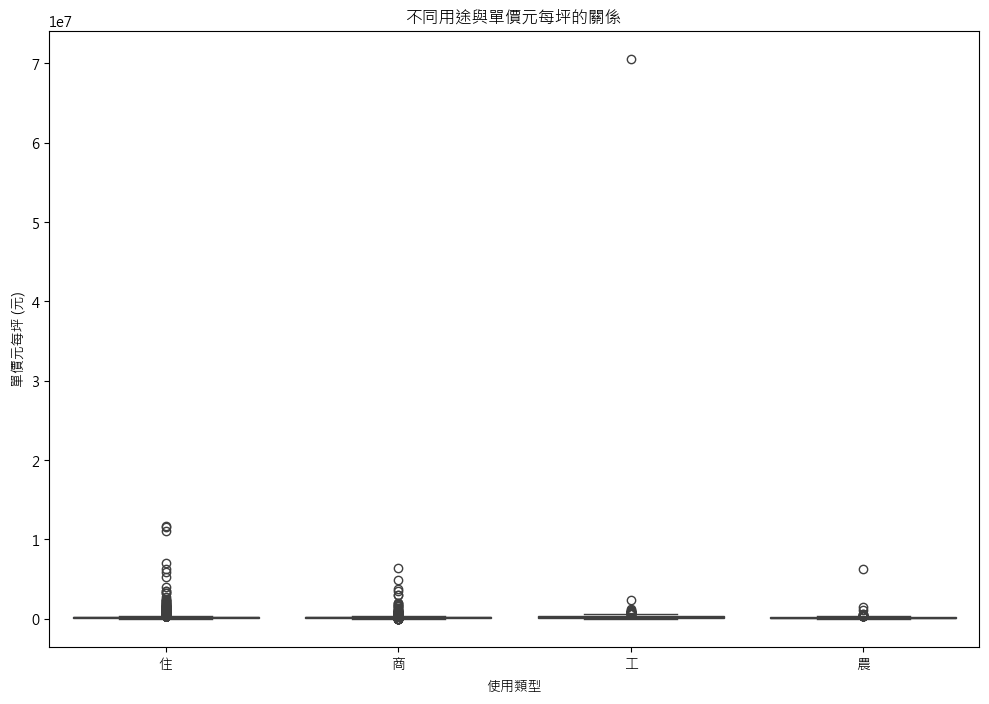

In [22]:
# 過濾掉未使用建材的行，只保留有使用的建材
df_use_filtered = df[
    (df["住"] == 1) | (df["商"] == 1) | (df["工"] == 1) | (df["農"] == 1)
]

# 將多個建材列轉換為長格式，方便繪圖
df_use_melted = df_use_filtered.melt(
    id_vars="單價元每坪",
    value_vars=["住", "商", "工", "農"],
    var_name="使用類型",
    value_name="用途",
)

# 過濾掉「未使用建材」的行
df_use_melted = df_use_melted[df_use_melted["用途"] == 1]

# 繪製箱型圖，顯示不同建材的房價分佈
plt.figure(figsize=(12, 8))
sns.boxplot(x="使用類型", y="單價元每坪", data=df_use_melted)
plt.title("不同用途與單價元每坪的關係")
plt.xlabel("使用類型")
plt.ylabel("單價元每坪 (元)")
plt.xticks(rotation=0)
plt.show()

#### 友善設施與嫌惡設施

KeyError: 'good_count_500'

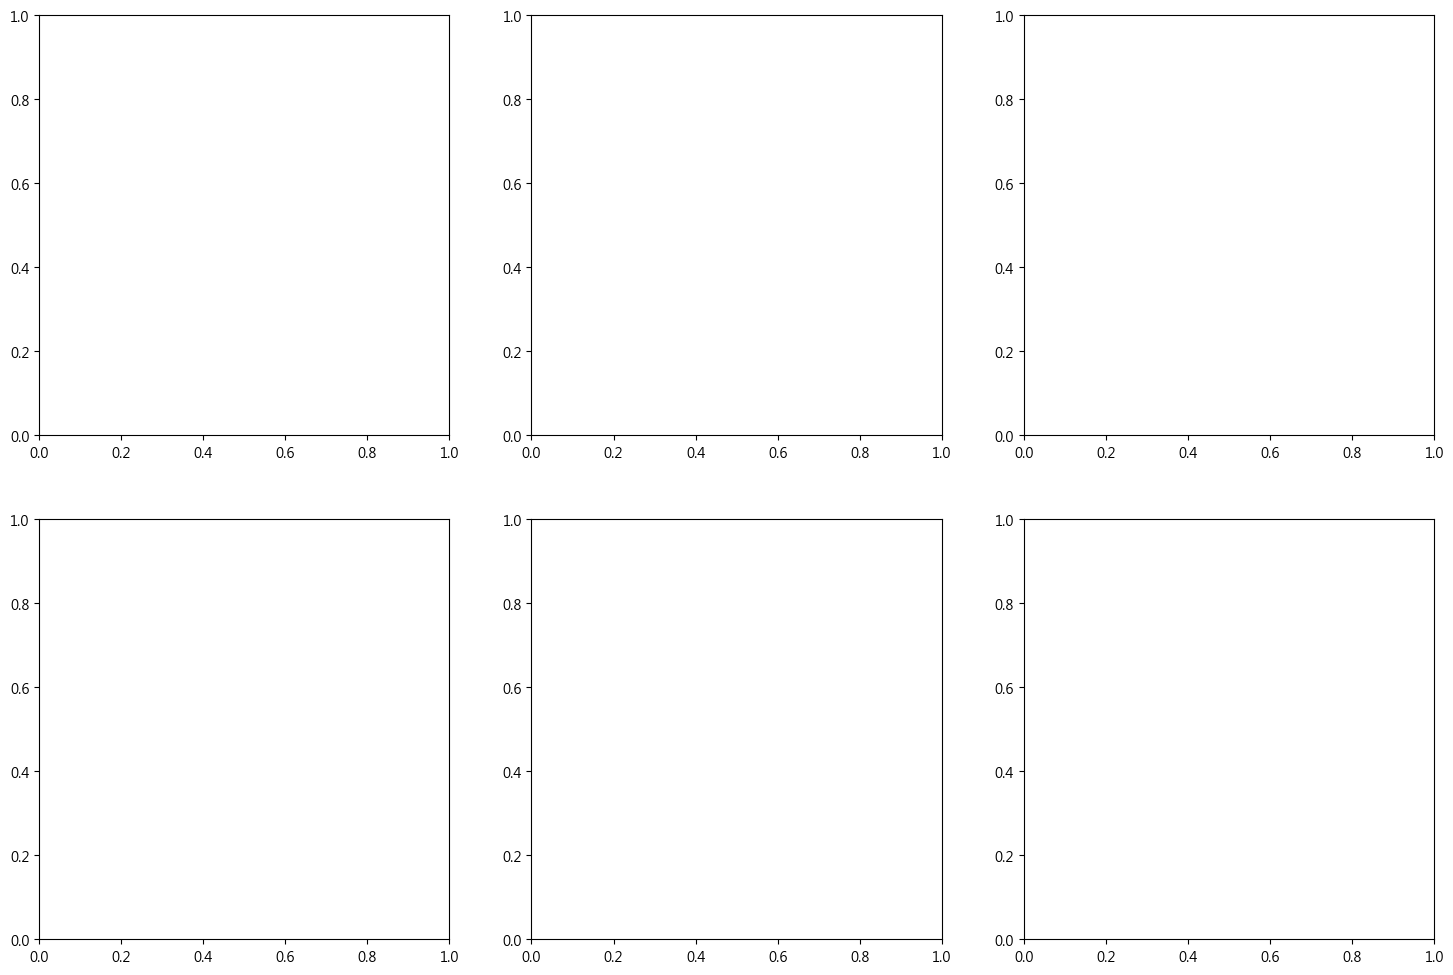

In [23]:
# 創建一個 2x3 的子圖：上面一行顯示友善設施，下面一行顯示嫌惡設施
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 調整大小

# 繪製 500 公尺內友善設施數量與房價的關係
sns.regplot(
    x="good_count_500",
    y="單價元每坪",
    data=df,
    scatter_kws={"s": 10},
    line_kws={"color": "blue"},
    ax=axes[0, 0],
)
axes[0, 0].set_title("500 公尺內友善設施數量與單價元每坪的關係")
axes[0, 0].set_xlabel("500 公尺內友善設施數量")
axes[0, 0].set_ylabel("單價元每坪 (元)")

# 繪製 1000 公尺內友善設施數量與房價的關係
sns.regplot(
    x="good_count_1000",
    y="單價元每坪",
    data=df,
    scatter_kws={"s": 10},
    line_kws={"color": "blue"},
    ax=axes[0, 1],
)
axes[0, 1].set_title("1000 公尺內友善設施數量與單價元每坪的關係")
axes[0, 1].set_xlabel("1000 公尺內友善設施數量")
axes[0, 1].set_ylabel("單價元每坪 (元)")

# 繪製 1500 公尺內友善設施數量與房價的關係
sns.regplot(
    x="good_count_1500",
    y="單價元每坪",
    data=df,
    scatter_kws={"s": 10},
    line_kws={"color": "blue"},
    ax=axes[0, 2],
)
axes[0, 2].set_title("1500 公尺內友善設施數量與單價元每坪的關係")
axes[0, 2].set_xlabel("1500 公尺內友善設施數量")
axes[0, 2].set_ylabel("單價元每坪 (元)")

# 繪製 500 公尺內嫌惡設施數量與房價的關係
sns.regplot(
    x="bad_count_500",
    y="單價元每坪",
    data=df,
    scatter_kws={"s": 10},
    line_kws={"color": "red"},
    ax=axes[1, 0],
)
axes[1, 0].set_title("500 公尺內嫌惡設施數量與單價元每坪的關係")
axes[1, 0].set_xlabel("500 公尺內嫌惡設施數量")
axes[1, 0].set_ylabel("單價元每坪 (元)")

# 繪製 1000 公尺內嫌惡設施數量與房價的關係
sns.regplot(
    x="bad_count_1000",
    y="單價元每坪",
    data=df,
    scatter_kws={"s": 10},
    line_kws={"color": "red"},
    ax=axes[1, 1],
)
axes[1, 1].set_title("1000 公尺內嫌惡設施數量與單價元每坪的關係")
axes[1, 1].set_xlabel("1000 公尺內嫌惡設施數量")
axes[1, 1].set_ylabel("單價元每坪 (元)")

# 繪製 1500 公尺內嫌惡設施數量與房價的關係
sns.regplot(
    x="bad_count_1500",
    y="單價元每坪",
    data=df,
    scatter_kws={"s": 10},
    line_kws={"color": "red"},
    ax=axes[1, 2],
)
axes[1, 2].set_title("1500 公尺內嫌惡設施數量與單價元每坪的關係")
axes[1, 2].set_xlabel("1500 公尺內嫌惡設施數量")
axes[1, 2].set_ylabel("單價元每坪 (元)")

# 調整佈局，避免重疊
plt.tight_layout()

# 顯示圖表
plt.show()

In [24]:
# 計算相關係數矩陣
corr_matrix_goodbadcount = df[
    [
        "單價元每坪",
        "good_count_500",
        "bad_count_500",
        "good_count_1000",
        "bad_count_1000",
        "good_count_1500",
        "bad_count_1500",
    ]
].corr()

# 可視化相關係數矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_goodbadcount, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("友善設施與嫌惡設施數量與單價元每坪的相關係數")
plt.show()

KeyError: "['good_count_500', 'bad_count_500', 'good_count_1000', 'bad_count_1000', 'good_count_1500', 'bad_count_1500'] not in index"